# Breast Cancer Detection Model using CNNs

## 1.Importing the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

## 2.Loading the data into pandas dataframe

In [2]:
#benign cancer data set loading

INPUT_SHAPE = (64,64)
data_set_benign = []
data_dir = "Dataset_BUSI_with_GT/benign"
for file_name in os.listdir(data_dir):
    img = cv2.imread(os.path.join(data_dir, file_name))
    img = cv2.resize(img,INPUT_SHAPE)
    data_set_benign.append(np.array(img))
print(len(data_set_benign))
len(data_set_benign)

9349


9349

In [3]:
# Malignant cancer data set loading

data_set_malignant = []
data_dir1 = "Dataset_BUSI_with_GT/malignant"
for file_name in os.listdir(data_dir1):
    img = cv2.imread(os.path.join(data_dir1, file_name))
    img = cv2.resize(img,INPUT_SHAPE)
    data_set_malignant.append(np.array(img))
len(data_set_malignant)

4164

In [4]:
# Normal cells data set loading 
data_set_normal = []
data_dir2 = "Dataset_BUSI_with_GT/normal"
for file_name in os.listdir(data_dir2):
    img = cv2.imread(os.path.join(data_dir2, file_name))
    img = cv2.resize(img,INPUT_SHAPE)
    data_set_normal.append(np.array(img))
len(data_set_normal)

9913

## 3.Visualizing the data 

### Normal breast image & mask

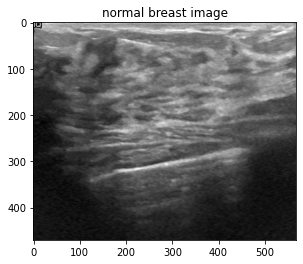

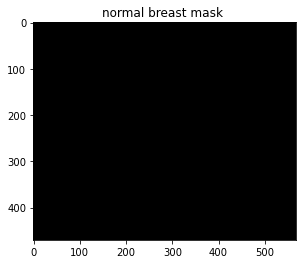

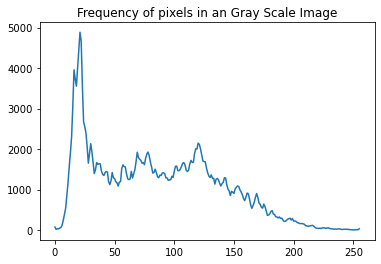

In [25]:
plt.figure()
plt.imshow(data_set_normal[0])
plt.title("normal breast image")
plt.savefig('normal.jpg',bbox_inches='tight', dpi=150)
plt.figure()
plt.imshow(data_set_normal[1])
plt.title("normal breast mask ")
plt.savefig('normalMask.jpg',bbox_inches='tight', dpi=150)
plt.figure()
histr = cv2.calcHist([data_set_normal[0]],[0],None,[256],[0,256])
plt.plot(histr)
plt.title("Frequency of pixels in an Gray Scale Image")
plt.savefig('NormalPixelFreq.jpg',bbox_inches='tight', dpi=250)
plt.show()

###  Benign breast cancer & Mask

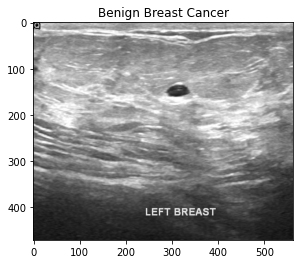

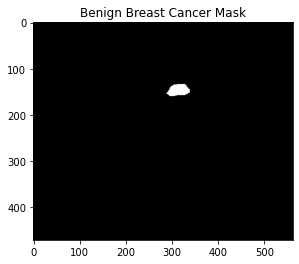

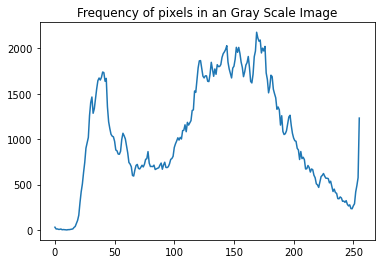

In [26]:
plt.figure()
plt.imshow(data_set_benign[0])
plt.title("Benign Breast Cancer")
plt.savefig('beingn.jpg',bbox_inches='tight', dpi=150)
plt.figure()
plt.imshow(data_set_benign[1])
plt.title("Benign Breast Cancer Mask")
plt.savefig('beingnMask.jpg',bbox_inches='tight', dpi=150)
plt.figure()
histr1 = cv2.calcHist([data_set_benign[0]],[0],None,[256],[0,256])
plt.plot(histr1)
plt.title("Frequency of pixels in an Gray Scale Image")
plt.savefig('benignFreqPixels',bbox_inches='tight', dpi=150)
plt.show()

### Malignant breast cancer & Mask

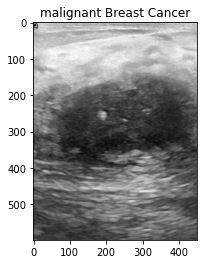

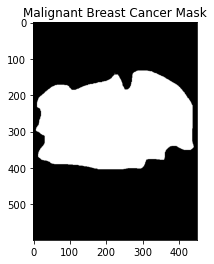

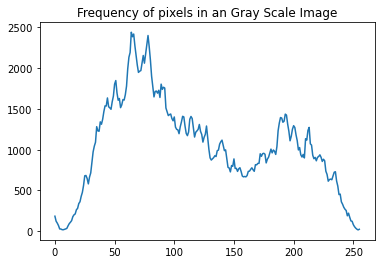

In [27]:
plt.figure()
plt.imshow(data_set_malignant[0])
plt.title("malignant Breast Cancer")
plt.savefig('malignant.jpg',bbox_inches='tight', dpi=150)
plt.figure()
plt.imshow(data_set_malignant[1])
plt.title("Malignant Breast Cancer Mask")
plt.savefig('malignantMask.jpg',bbox_inches='tight', dpi=150)
plt.figure()
histr2 = cv2.calcHist([data_set_malignant[0]],[0],None,[256],[0,256])
plt.plot(histr2)
plt.title("Frequency of pixels in an Gray Scale Image")
plt.savefig('MAlignantFreqPixels.jpg',bbox_inches='tight', dpi=150)
plt.show()

### Visulalizing the balance of the dataset 

First of all the data set was not balanced, and it had slightly very small number of images.
I managed to solve both of these problems using keras image augmentation techniqeus in a separate notebook to make this notebook clear enough
The balancing of the images to be identically balanced was difficult for me so I decided to balance as much as I could resulting in the folowing chart. 

#### Chart Expressing the balance of the dataset after performing image augmentation

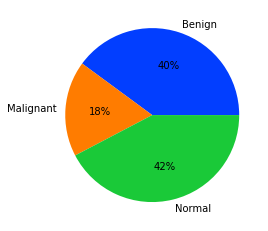

In [6]:
import seaborn
palette_color = seaborn.color_palette('bright')
plt.pie([len(data_set_benign),len(data_set_malignant), len(data_set_normal)], labels=["Benign", "Malignant", "Normal"], colors=palette_color, autopct='%.0f%%')
plt.savefig('pieChart.jpg',bbox_inches='tight', dpi=150)

The above plot shows that our data us not balanced this may lead to some bias towards the benign

## Preprocessing the data

In [5]:
#concatenating all the cancerous images
data_set_cancer = np.concatenate((data_set_benign, data_set_malignant))

In [6]:
#check size
len(data_set_cancer)==(len(data_set_benign)+len(data_set_malignant))

True

In [7]:
#check type
type(data_set_cancer[0])

numpy.ndarray

In [8]:
#check shape
data_set_cancer[0].shape

(64, 64, 3)

In [9]:
#creating labels for the cancerous images
label = np.ones((len(data_set_cancer),), dtype=int)
len(label)==len(data_set_cancer)

True

In [10]:
#check labels shape
label.shape

(13513,)

In [11]:
#creating a label for non-cancerous
non_cancer_label = np.zeros((len(data_set_normal),), dtype=int)
non_cancer_label

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
type(non_cancer_label)==type(label)

True

In [13]:
# concatenating labels and non_cancer_labels
#concatenating non-cancerous images to cancerous images
targets = np.concatenate((label, non_cancer_label))
data_set_all = np.concatenate((data_set_cancer, data_set_normal))
len(targets)==len(data_set_all)

True

In [14]:
len(data_set_all)

23426

In [15]:
del data_set_normal, data_set_malignant, data_set_benign, data_set_cancer, label,non_cancer_label

In [16]:
#target dataset containg the labels for each input
targets

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
#final datset contaiing input images for all classes
data_set_all

array([[[[183, 183, 183],
         [101, 101, 101],
         [188, 188, 188],
         ...,
         [190, 190, 190],
         [217, 217, 217],
         [196, 196, 196]],

        [[134, 134, 134],
         [102, 102, 102],
         [179, 179, 179],
         ...,
         [150, 150, 150],
         [153, 153, 153],
         [156, 156, 156]],

        [[195, 195, 195],
         [180, 180, 180],
         [216, 216, 216],
         ...,
         [166, 166, 166],
         [153, 153, 153],
         [168, 168, 168]],

        ...,

        [[ 33,  33,  33],
         [ 26,  26,  26],
         [ 34,  34,  34],
         ...,
         [ 20,  20,  20],
         [ 21,  21,  21],
         [ 21,  21,  21]],

        [[ 27,  27,  27],
         [ 23,  23,  23],
         [ 29,  29,  29],
         ...,
         [ 25,  25,  25],
         [ 30,  30,  30],
         [ 16,  16,  16]],

        [[ 26,  26,  26],
         [ 27,  27,  27],
         [ 24,  24,  24],
         ...,
         [ 26,  26,  26],
        

## 3.Splitting the data into training and testing data using scikit-learn

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data_set_all, targets, test_size=0.3, random_state=42)

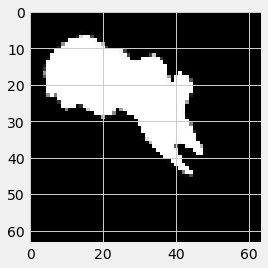

(64, 64, 3)

In [174]:
#show an image of the training data to make sure there is nothing wrong
plt.imshow(x_train[0])
plt.show()
y_train[0]
x_train[1000].shape

## 4.Building the model

In [24]:
model=Sequential()

# 1st conv2D layer
model.add(Conv2D(64,(3,3), padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))


# 2st conv2D layer
model.add(Conv2D(64,(3,3), padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd conv2D layer
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))



# 4th conv2D layer
model.add(Conv2D(128,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#5th
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation("relu"))

#6th
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation("relu"))

#7th
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#8th
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Activation("relu"))

#9th
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Activation("relu"))

#10th
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#falttenning 
model.add(Flatten())

#dense layer
model.add(Dense(4096))
model.add(Activation('relu'))

#regularization layer
model.add(Dropout(0.5))

#output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Plotting function that creats the results plots

In [27]:
def tr_plot(tr_data, start_epoch):
    #Plot the loss and accuracy curve
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.savefig('ssa.jpg')
    plt.show()

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=100,verbose=1,epochs=20
          , validation_data=(x_test,y_test),
          shuffle=False)
# plot the history
#tr_plot(history,0)

Epoch 1/20
164/164 [==============================] - 382s 2s/step - loss: 1.1774 - accuracy: 0.7935 - val_loss: 0.3210 - val_accuracy: 0.8147
Epoch 2/20
164/164 [==============================] - 349s 2s/step - loss: 0.3011 - accuracy: 0.8313 - val_loss: 0.2826 - val_accuracy: 0.8564
Epoch 3/20
164/164 [==============================] - 316s 2s/step - loss: 0.3013 - accuracy: 0.8344 - val_loss: 0.2755 - val_accuracy: 0.8682
Epoch 4/20
164/164 [==============================] - 314s 2s/step - loss: 0.2560 - accuracy: 0.8799 - val_loss: 0.2223 - val_accuracy: 0.9030
Epoch 5/20
164/164 [==============================] - 316s 2s/step - loss: 0.2181 - accuracy: 0.9030 - val_loss: 0.2103 - val_accuracy: 0.9058
Epoch 6/20
164/164 [==============================] - 320s 2s/step - loss: 0.1906 - accuracy: 0.9177 - val_loss: 0.1790 - val_accuracy: 0.9246
Epoch 7/20
164/164 [==============================] - 312s 2s/step - loss: 0.1589 - accuracy: 0.9327 - val_loss: 0.1642 - val_accuracy: 0.9327

## 5.Results

Plotting the training and validation loss curves &
Plotting the training and validaiton accuracy 

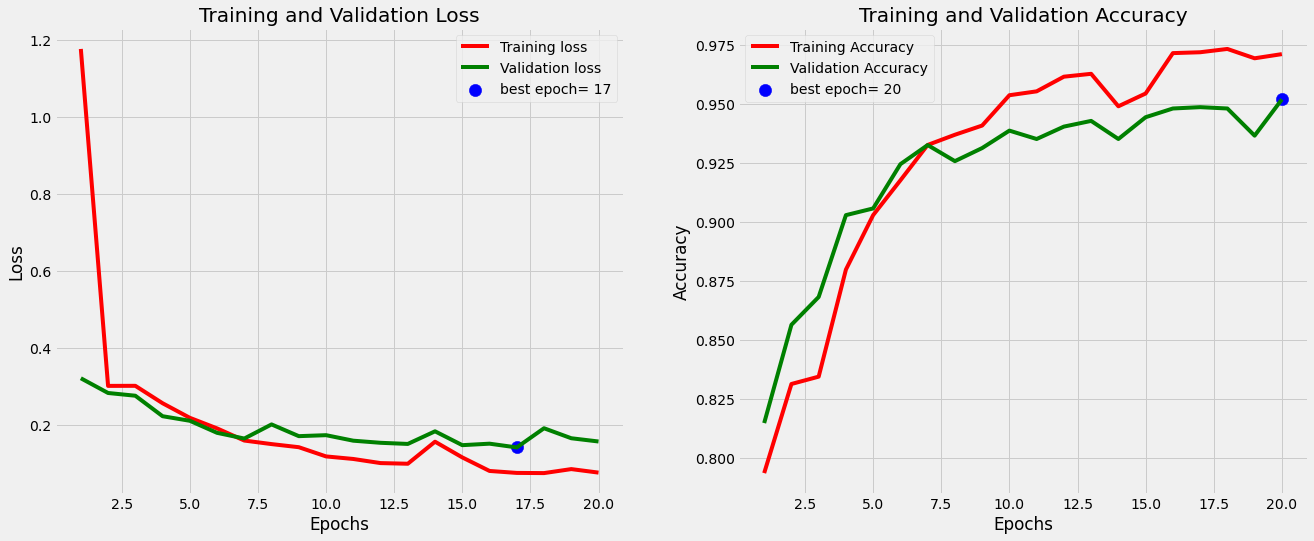

In [28]:
tr_plot(history,0)

Showing the model summary 

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 activation_10 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

saving the model summary as a text file

In [34]:
"""with open('modelsummary2.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))"""

The model gives a training accuracy of 97.13% and validation accuracy 95.20% this is a high accuracy and I think it can be better if I managed to make the set more balanced 
the loss is quite impressive around 0.07 for training and 0.14 for validation

## Wait!! we are not done yet

we trained our model on several classes of data thats why the model can predict the presence of a tumor in any type of data whether it is ultrasound or x-ray data 

I kept looking for x-ray datasets to very my claims and I managed to find a good one but I had a problem downloading this data since it was very large and this would consume alot of time so instead I accessed It from kaggle and worked on kaggle a notebook to create a numpy array containaing nd numpy arrays representing each image and saved it to a .npy file which I will use next.
Note: the x-ray data are all cancerous 

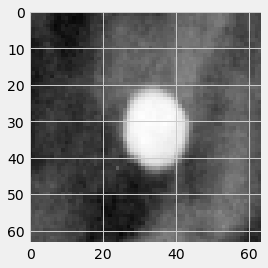

In [35]:
with open('test.npy', 'rb') as f:
    ds = np.load(f)
z =  np.ones((len(ds),), dtype=int)
plt.imshow(ds[125])
#plt.savefig('x-ray dataset image',bbox_inches='tight', dpi=150)

In [65]:
pred = model.predict(
    ds,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

320/320 [==============================] - 51s 160ms/step


In [67]:
import scipy
pred = scipy.special.round(pred)

In [68]:
pred[0]

array([1.], dtype=float32)

The model appears to predict the tumor from the x-ray data set very well